In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv")
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [14]:
from sklearn.model_selection import train_test_split
x = data['Experience Years']
y = data['Salary']
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# X_train and y_train are your training data
# X_test and y_test are your testing data


In [15]:
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Scatter Plot')

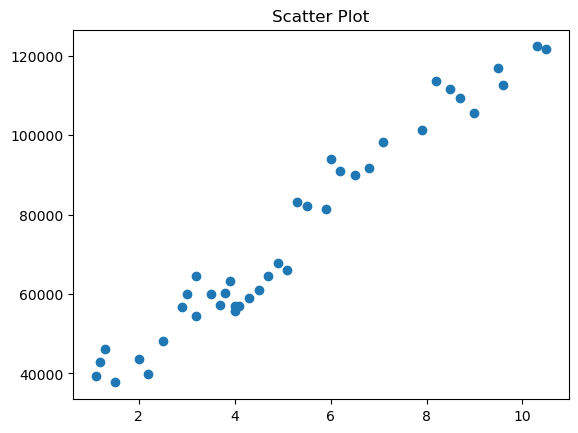

In [17]:
plt.scatter(x,y)
plt.title("Scatter Plot")

In [21]:
model = LinearRegression()

Training Mean Squared Error: 24546972.16
Training R^2 Score: 0.96


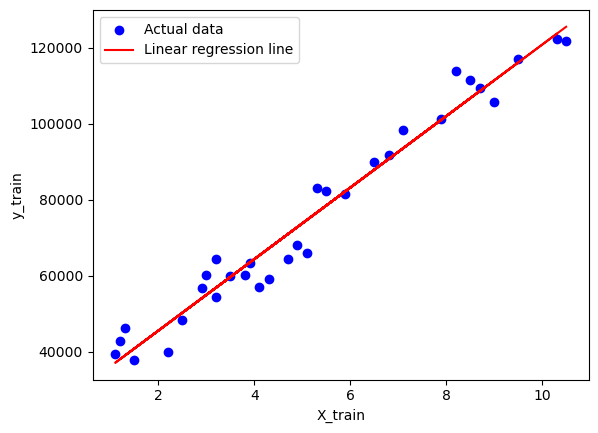

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


if len(X_train.shape) == 1:
    X_train = X_train.to_numpy().reshape(-1, 1)
    
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Training R^2 Score: {train_r2:.2f}')

# Visualize the results (for simple linear regression with one feature)
plt.scatter(X_train, y_train, color='blue', label='Actual data')
plt.plot(X_train, y_train_pred, color='red', label='Linear regression line')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

In [28]:
## linear 
## multi
## poly 
## logistic

Multiple Linear Regression

In [31]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
data = pd.read_csv("D:/New Downloads/data.csv")


In [35]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [38]:
data[data.isnull()].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [40]:
data[data.duplicated()].count()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [42]:
x = data[["sqft_living","bedrooms"]]
y = data['price']

In [44]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([ 364379.92612894,  403263.38798167,  812535.76116752,
        588457.84364823,  443110.00525734,  713882.37340128,
        501916.7757479 ,  492832.53584847,  486776.37591552,
        498888.69578142,  777472.0526973 ,  272264.27600713,
        835005.57206036,  495860.61581495,  403744.96569314,
        622558.3966955 ,  674517.33383708,  733805.68203912,
        951827.43962545,  971269.17055181,  773170.72160332,
        686629.65370299,  636907.12311186,  468607.89611666,
        235927.31640941,  220786.91657703,  715637.20224026,
        816837.09226149,  390359.39469973,  691412.56250844,
       1553452.1975314 ,  354022.43510201, 1274077.1671995 ,
        494105.78697597,  199108.77910022,  442628.42754586,
        877398.69159103,  793404.12594571,  285649.84700054,
        615710.56334652,  430997.68539143,  376492.24599485,
        474664.05604961,  414102.45672007,  303818.3267994 ,
        318958.72663179,  503671.60458688,  442628.42754586,
        754520.66409298,

In [49]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 991070536292.2631


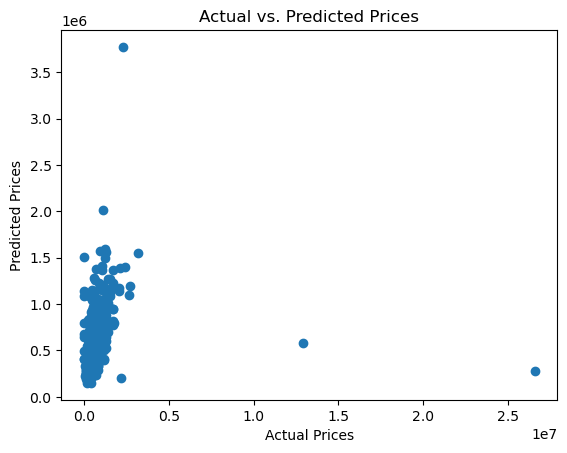

In [50]:
plt.scatter(y_test, predictions)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Mean Squared Error: 1020699708790.1072


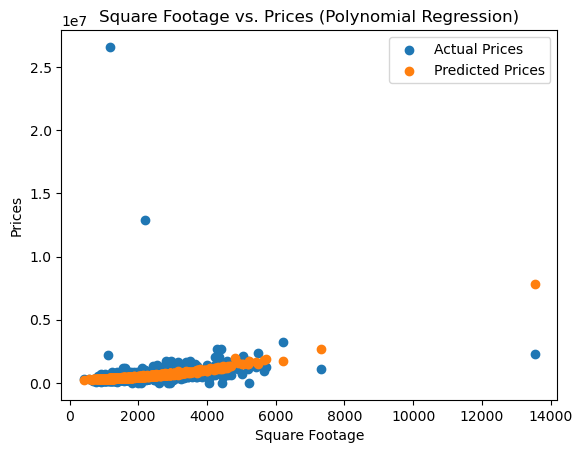

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns
# df = pd.read_csv("your_dataset.csv")

# Selecting relevant columns for this example
selected_columns = ['price', 'sqft_living', 'bedrooms']
df_selected = data[selected_columns]

# Split the data into training and testing sets
X = df_selected[['sqft_living', 'bedrooms']]
y = df_selected['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features (degree=2 for this example)
degree = 2
poly = PolynomialFeatures(degree=degree)

# Transform both training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the polynomial features of the training data
model.fit(X_train_poly, y_train)

# Make predictions on the polynomial features of the testing data
predictions = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.scatter(X_test['sqft_living'], y_test, label='Actual Prices', marker='o')
plt.scatter(X_test['sqft_living'], predictions, label='Predicted Prices', marker='o')
plt.title('Square Footage vs. Prices (Polynomial Regression)')
plt.xlabel('Square Footage')
plt.ylabel('Prices')
plt.legend()
plt.show()
